In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import cv2 as cv
import os

In [2]:
(training_images, training_labels),(testing_images, testing_labels) = datasets.cifar10.load_data()

In [3]:
training_images, testing_images = training_images/255, testing_images/255

In [4]:
class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [5]:
training_images.shape


(50000, 32, 32, 3)

In [6]:
#building neural network
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu')) 
model.add(layers.Dense(10, activation = 'softmax'))


In [7]:
#compiling the model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),loss = tf.keras.losses.SparseCategoricalCrossentropy, metrics = ['accuracy'])

In [8]:
#fitting the model
model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3633 - loss: 1.7350
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5773 - loss: 1.1954
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6421 - loss: 1.0204 
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6845 - loss: 0.8991
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7107 - loss: 0.8283
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7326 - loss: 0.7651
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7485 - loss: 0.7146
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7700 - loss: 0.6566
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7840 - loss: 0.6184
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7926 - loss: 0.5841


In [9]:
loss, accuracy = model.evaluate(testing_images, testing_labels)

print(f"Loss  : {loss}")
print(f"Accuracy  : {accuracy*100}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7257 - loss: 0.8447   
Loss  : 0.8485634922981262
Accuracy  : 72.18999862670898


In [10]:
print(os.getcwd())

C:\Users\hp\OneDrive\Desktop\ML projects


In [35]:
img = cv.imread('plane.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

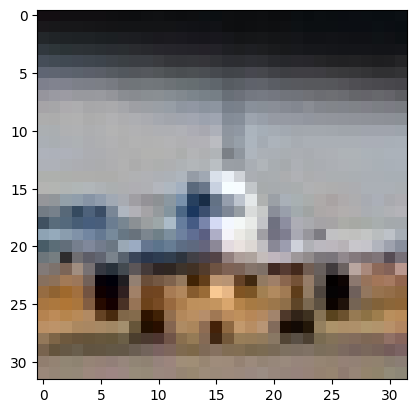

In [36]:
plt.imshow(img, cmap = plt.cm.binary)

In [37]:
prediction = model.predict(np.array([img])/ 255)
index = np.argmax(prediction)
print(f"Prediction is {class_names[index]}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction is Ship


In [1]:
import tensorflow as tf

# Check available devices
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Physical GPUs: ", physical_devices)

# Check if TensorFlow is using the GPU
print("Num GPUs Available: ", len(physical_devices))


Physical GPUs:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1
